In [1]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [4]:
#  1=male and 0=female

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:>

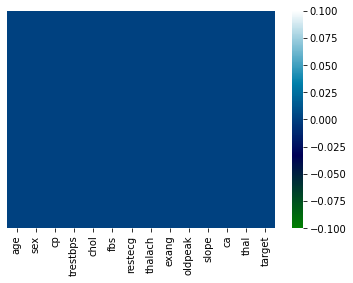

In [12]:
sns.heatmap(df.isnull(),cmap='ocean',yticklabels=False)

In [13]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [14]:
df.target.unique()

array([1, 0], dtype=int64)

In [15]:
# male=1 and 0=female
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

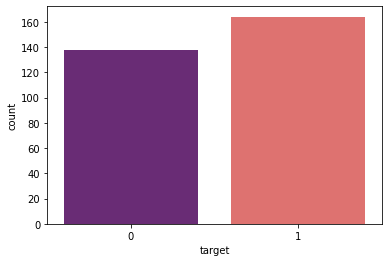

In [16]:
sns.countplot(data=df,x='target',palette = 'magma')

In [17]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

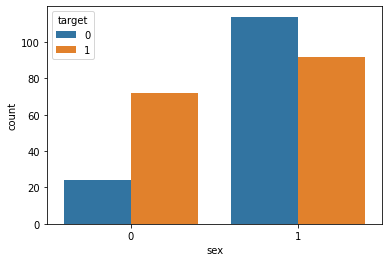

In [18]:
sns.countplot(data=df,x='sex',hue='target')

In [19]:
df.groupby('fbs')['target'].value_counts()

fbs  target
0    1         141
     0         116
1    1          23
     0          22
Name: target, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='count'>

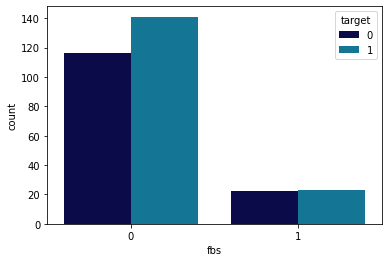

In [20]:
sns.countplot(data=df,x='fbs',hue='target',palette = 'ocean')

In [21]:
df.groupby('exang')['target'].value_counts()

exang  target
0      1         141
       0          62
1      0          76
       1          23
Name: target, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='count'>

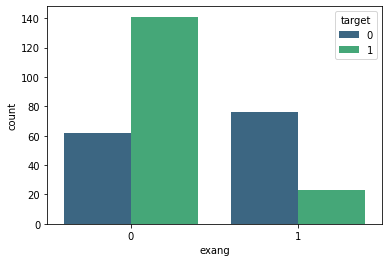

In [22]:
sns.countplot(data=df,x='exang',hue='target',palette = 'viridis')

In [23]:
correlation = df.corr()
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

In [24]:
df.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

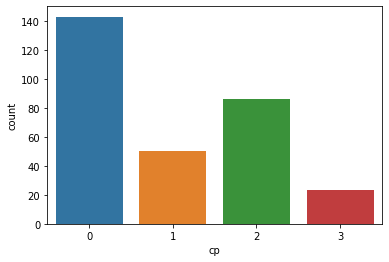

In [25]:
sns.countplot(data=df,x='cp')

In [26]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          68
    0          18
3   1          16
    0           7
Name: target, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

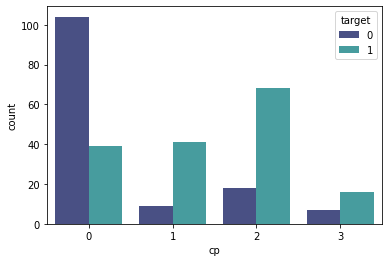

In [27]:
sns.countplot(data=df,x='cp',hue='target',palette='mako')

In [28]:
df['thalach'].nunique()

91

<AxesSubplot:xlabel='thalach', ylabel='Density'>

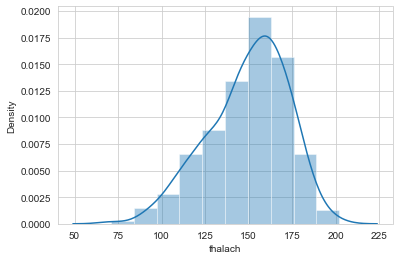

In [29]:
sns.set_style('whitegrid')
sns.distplot(df['thalach'],bins=10)

<AxesSubplot:xlabel='target', ylabel='thalach'>

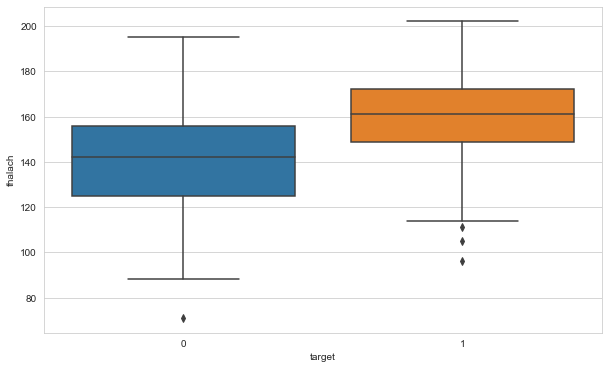

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x="target", y="thalach", data=df)

In [31]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

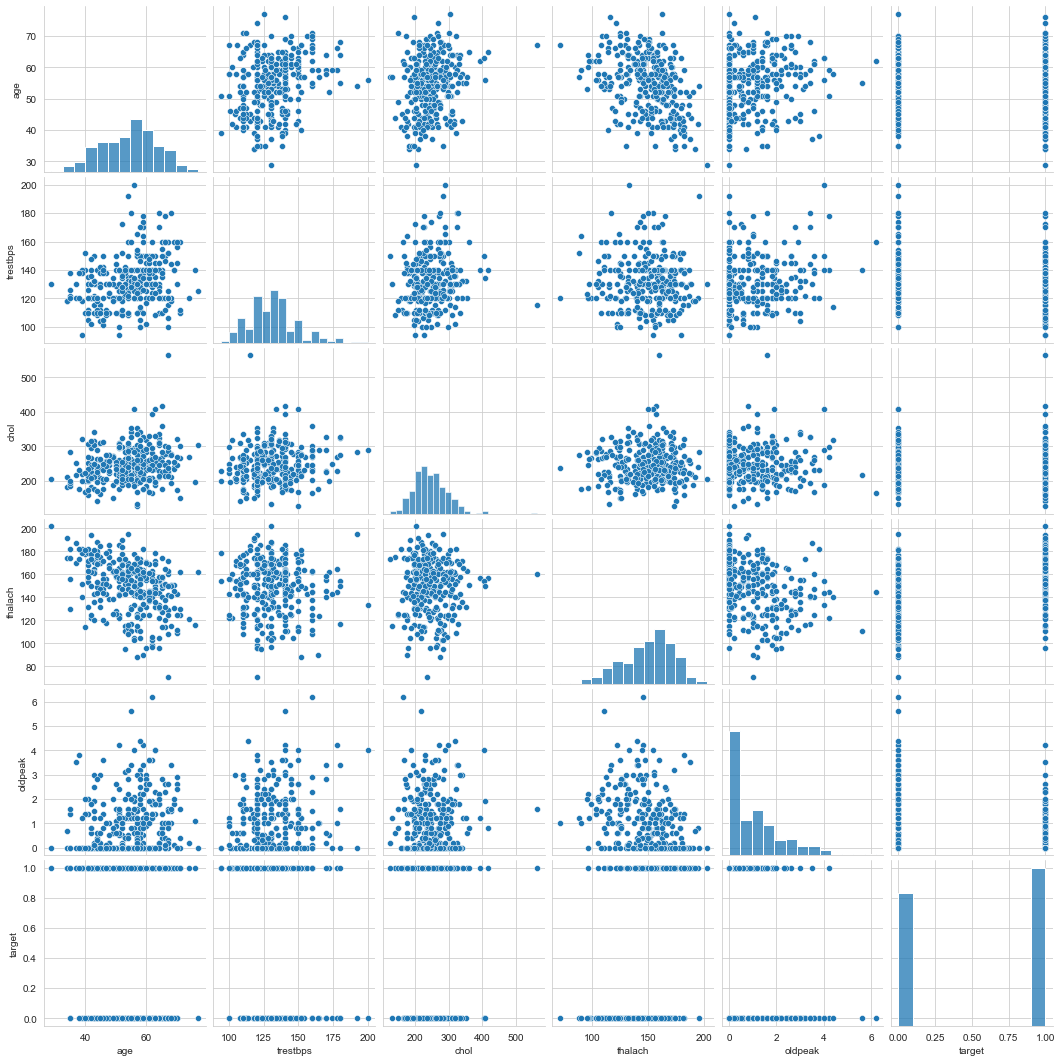

In [32]:
sns.pairplot(df[cols],diag_kind='hist')

<AxesSubplot:>

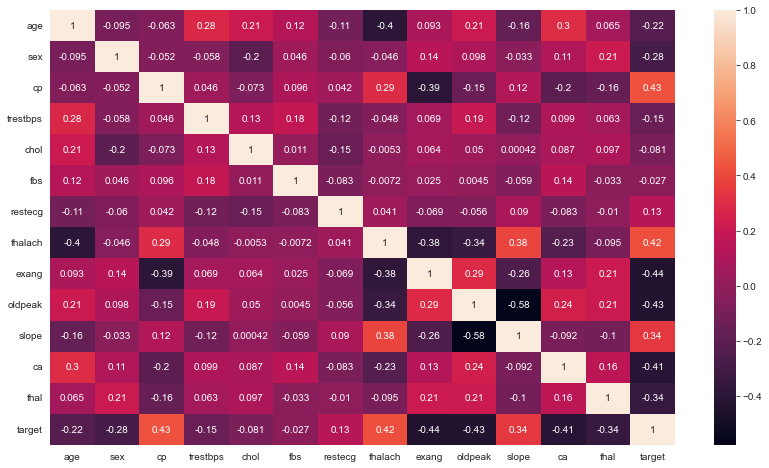

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

#### Continous Variable Analysis

In [34]:
df.age.nunique()

41

In [35]:
df.age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

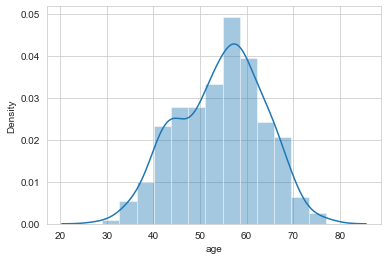

In [36]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='target', ylabel='age'>

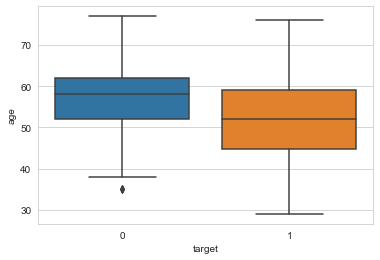

In [37]:
sns.boxplot(data=df,y='age',x='target')

In [38]:
df.trestbps.describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

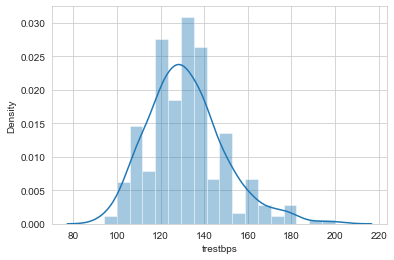

In [39]:
sns.distplot(df['trestbps'])

<AxesSubplot:xlabel='target', ylabel='trestbps'>

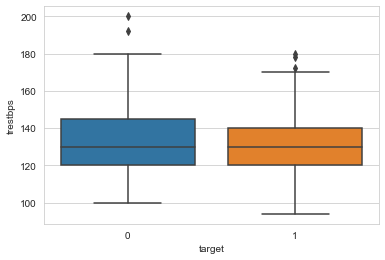

In [40]:
sns.boxplot(data=df,y='trestbps',x='target')

In [41]:
df.chol.describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

In [42]:
df.chol.nunique()

152

<AxesSubplot:xlabel='chol', ylabel='Density'>

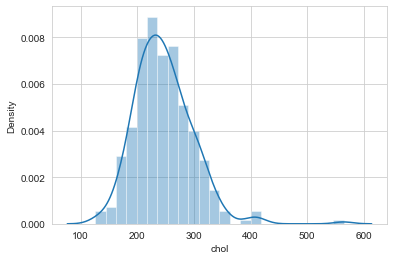

In [43]:
sns.distplot(df['chol'])

<AxesSubplot:xlabel='target', ylabel='chol'>

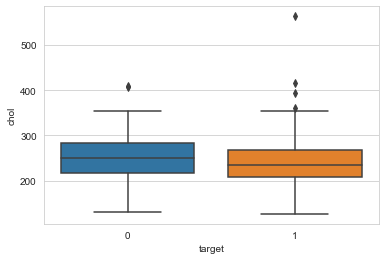

In [44]:
sns.boxplot(data=df,y='chol',x='target')

In [45]:
df.oldpeak.nunique()

40

In [46]:
df.oldpeak.describe()

count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

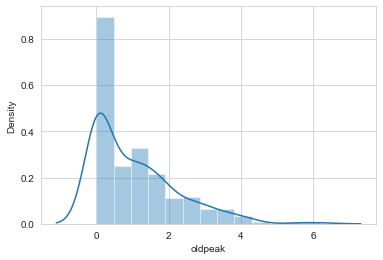

In [47]:
sns.distplot(df['oldpeak'])

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

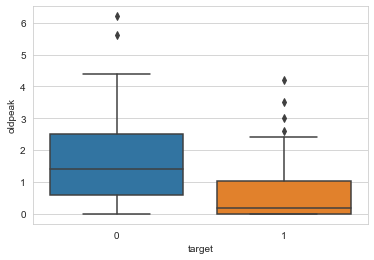

In [48]:
sns.boxplot(data=df,y='oldpeak',x='target')

## Outliers 

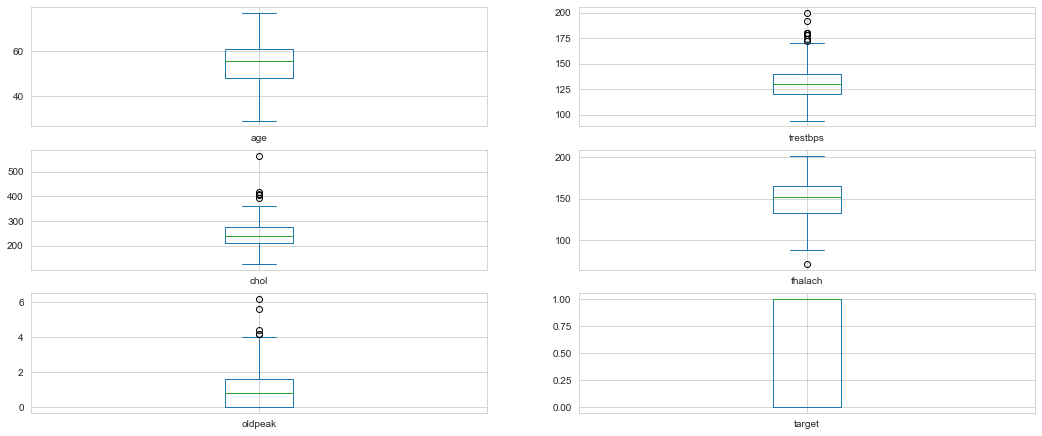

In [49]:
df[cols].plot(kind='box', subplots=True, layout=(7,2) ,figsize =(18,18))
plt.show()

In [50]:
outliers_cols = ['trestbps','chol','thalach','oldpeak']

In [51]:
for i in outliers_cols :
    print(df[i].skew())

0.7165414326647318
1.147332413980798
-0.5326712468229611
1.2661727209102187


In [52]:
new_df = df.copy()

for i in outliers_cols :
    quantile_25 = df[i].quantile(0.25)
    quantile_75 = df[i].quantile(0.75)
    iqr = quantile_75 - quantile_25

    lower_limit = quantile_25 -1.5*iqr
    upper_limit = quantile_75 +1.5*iqr

    '''print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)'''

    new_df[i] = np.where(
        new_df[i] > upper_limit,
        upper_limit,
        np.where(
            new_df[i] < lower_limit,
            lower_limit,
            new_df[i]
        )
    )

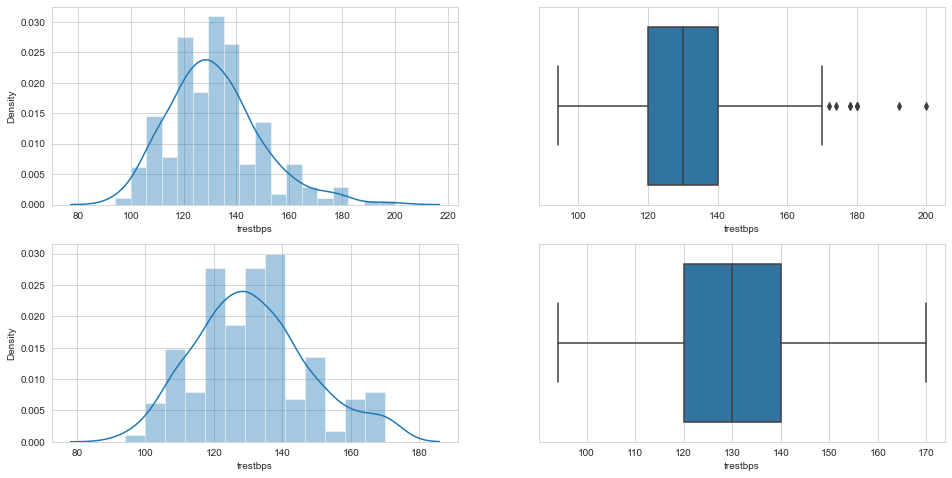

In [53]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['trestbps'])

plt.subplot(2,2,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,2,3)
sns.distplot(new_df['trestbps'])

plt.subplot(2,2,4)
sns.boxplot(new_df['trestbps'])

plt.show()

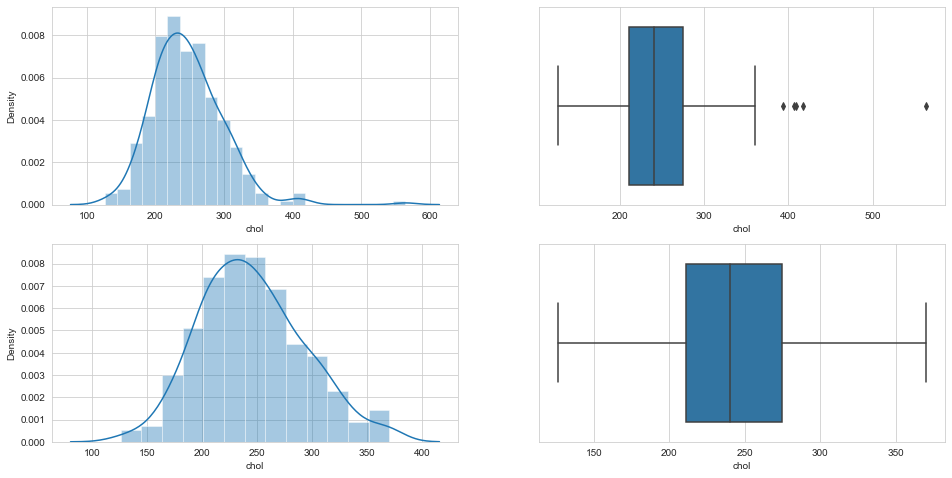

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['chol'])

plt.subplot(2,2,2)
sns.boxplot(df['chol'])

plt.subplot(2,2,3)
sns.distplot(new_df['chol'])

plt.subplot(2,2,4)
sns.boxplot(new_df['chol'])

plt.show()

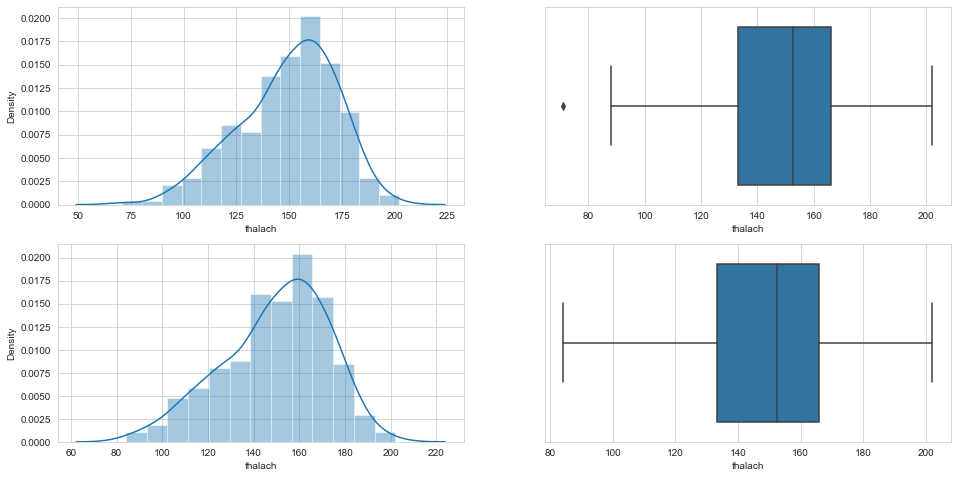

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['thalach'])

plt.subplot(2,2,2)
sns.boxplot(df['thalach'])

plt.subplot(2,2,3)
sns.distplot(new_df['thalach'])

plt.subplot(2,2,4)
sns.boxplot(new_df['thalach'])

plt.show()

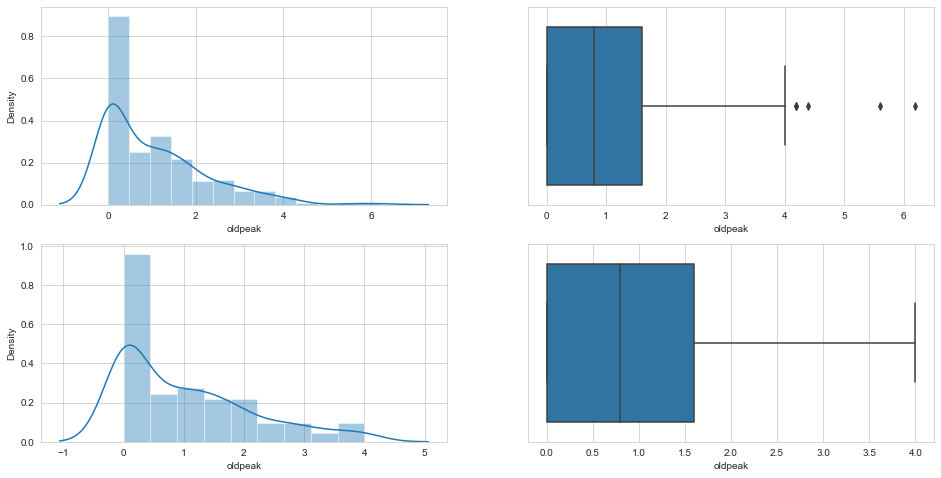

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['oldpeak'])

plt.subplot(2,2,2)
sns.boxplot(df['oldpeak'])

plt.subplot(2,2,3)
sns.distplot(new_df['oldpeak'])

plt.subplot(2,2,4)
sns.boxplot(new_df['oldpeak'])

plt.show()

In [57]:
X = new_df.drop(['target'],axis=1)
y = new_df['target']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = GaussianNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [64]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("*"*50)
    
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.5409836065573771
**************************************************
For  KN
Accuracy -  0.6557377049180327
**************************************************
For  NB
Accuracy -  0.8032786885245902
**************************************************
For  DT
Accuracy -  0.7540983606557377
**************************************************
For  LR
Accuracy -  0.8524590163934426
**************************************************
For  RF
Accuracy -  0.7868852459016393
**************************************************
For  AdaBoost
Accuracy -  0.819672131147541
**************************************************
For  BgC
Accuracy -  0.8032786885245902
**************************************************
For  ETC
Accuracy -  0.8360655737704918
**************************************************
For  GBDT
Accuracy -  0.7540983606557377
**************************************************
[10:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learn

In [65]:
results = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
results

,Algorithm,Accuracy
4,LR,0.852459
8,ETC,0.836066
6,AdaBoost,0.819672
2,NB,0.803279
7,BgC,0.803279
5,RF,0.786885
10,xgb,0.770492
3,DT,0.754098
9,GBDT,0.754098
1,KN,0.655738


In [66]:
import pickle
pickle.dump(etc,open('model.pkl','wb'))